# **Exploratory Data Analysis**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

In [ ]:
pd.set_option('max_rows',9999)

In [ ]:
df = pd.read_csv('spambase_csv.csv')

In [ ]:
df.head()

,class,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,1,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,1,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,1,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


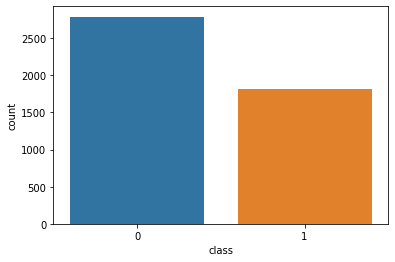

In [ ]:
# finding how many spam vs non-spam emails there are 

sns.countplot(x = 'class', data = df)

In [ ]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,0.059824,0.541702,0.093930,0.058626,0.049205,0.248848,0.142586,0.184745,1.662100,0.085577,0.809761,0.121202,0.101645,0.094269,0.549504,0.265384,0.767305,0.124845,0.098915,0.102852,0.064753,0.047048,0.097229,0.047835,0.105412,0.097477,0.136953,0.013201,0.078629,0.064834,0.043667,0.132339,0.046099,0.079196,0.301224,0.179824,0.005444,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,0.201545,0.861698,0.301036,0.335184,0.258843,0.825792,0.444055,0.531122,1.775481,0.509767,1.200810,1.025756,0.350286,0.442636,1.671349,0.886955,3.367292,0.538576,0.593327,0.456682,0.403393,0.328559,0.555907,0.329445,0.532260,0.402623,0.423451,0.220651,0.434672,0.349916,0.361205,0.766819,0.223812,0.621976,1.011687,0.911119,0.076274,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [ ]:
# checking for null values

print(df.isnull().any())

word_freq_make                False
word_freq_address             False
word_freq_all                 False
word_freq_3d                  False
word_freq_our                 False
word_freq_over                False
word_freq_remove              False
word_freq_internet            False
word_freq_order               False
word_freq_mail                False
word_freq_receive             False
word_freq_will                False
word_freq_people              False
word_freq_report              False
word_freq_addresses           False
word_freq_free                False
word_freq_business            False
word_freq_email               False
word_freq_you                 False
word_freq_credit              False
word_freq_your                False
word_freq_font                False
word_freq_000                 False
word_freq_money               False
word_freq_hp                  False
word_freq_hpl                 False
word_freq_george              False
word_freq_650               

In [ ]:
# looking deeper into data 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [ ]:
# checking the shape

df.shape

(4601, 58)

**Starting the Machine Learning Process**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:

# shift column 'class' to first position
first_column = df.pop('class')
  
df.insert(0, 'class', first_column)

In [ ]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [ ]:
# partition data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
                                                    X,
                                                    y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=42
                                                    )

In [ ]:
# computing baseline accuracy 
from sklearn.dummy import DummyClassifier

dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(X_train,y_train)
baseline_acc = dummy_classifier.score(X_test,y_test)


### For verifying answer:
print("Baseline Accuracy = ", baseline_acc)

Baseline Accuracy =  0.6060825488776249


**What to try first?**

Lets try boostrap sampling methods. This is doing random sample with replacement. This means that we can actually sample the same sample twice. We can try Skikit Learns "Bagging Classifer". This is method fits base classifers on random subsets of the data and then aggergates their individual predictions.

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

In [ ]:
baggingclassifer = BaggingClassifier(random_state= 42)
baggingclassifer.fit(X_train,y_train)
predict_bagging_score = baggingclassifer.predict(X_test)
accuracy_score_baggingclassifer = accuracy_score(y_test,predict_bagging_score)
print(accuracy_score_baggingclassifer)

0.9312092686459088


**Next, lets try Random Forest Classifation.** This is also another bagging method. This method is great because the trees within the algorithm are *de-corrleated*. By de-correlating the trees within the algorithm, we reduce the variance. This is because high correlated trees in an ensamble method could have features that weigh very heavily resulting low bias and high variance. In a Random Decision Forest, each tree will spit out a predition and the class with the most votes will become the output. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
randomForestClassifer = RandomForestClassifier(n_estimators=10,max_features=10, random_state= 42)
randomForestClassifer.fit(X_train,y_train)
predict_randomforest_score = randomForestClassifer.predict(X_test)
accuracy_score_randomforest = accuracy_score(y_test,predict_randomforest_score)
print(accuracy_score_randomforest)

0.939174511223751


What if we decided to increase the amount of trees and decrease the amount of features?

In [ ]:
randomForestClassifer = RandomForestClassifier(n_estimators=100,max_features =5, random_state= 42)
randomForestClassifer.fit(X_train,y_train)
predict_randomforest_score = randomForestClassifer.predict(X_test)
accuracy_score_randomforest = accuracy_score(y_test,predict_randomforest_score)
print(accuracy_score_randomforest)

0.9543808834178131


Lets see a report on our Random Forest Decision Tree.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predict_randomforest_score))
print(classification_report(y_test,predict_randomforest_score))
print(accuracy_score(y_test, predict_randomforest_score))

[[815  22]
 [ 41 503]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       837
           1       0.96      0.92      0.94       544

    accuracy                           0.95      1381
   macro avg       0.96      0.95      0.95      1381
weighted avg       0.95      0.95      0.95      1381

0.9543808834178131


Lets see the first tree within our Random Forest Classifer 

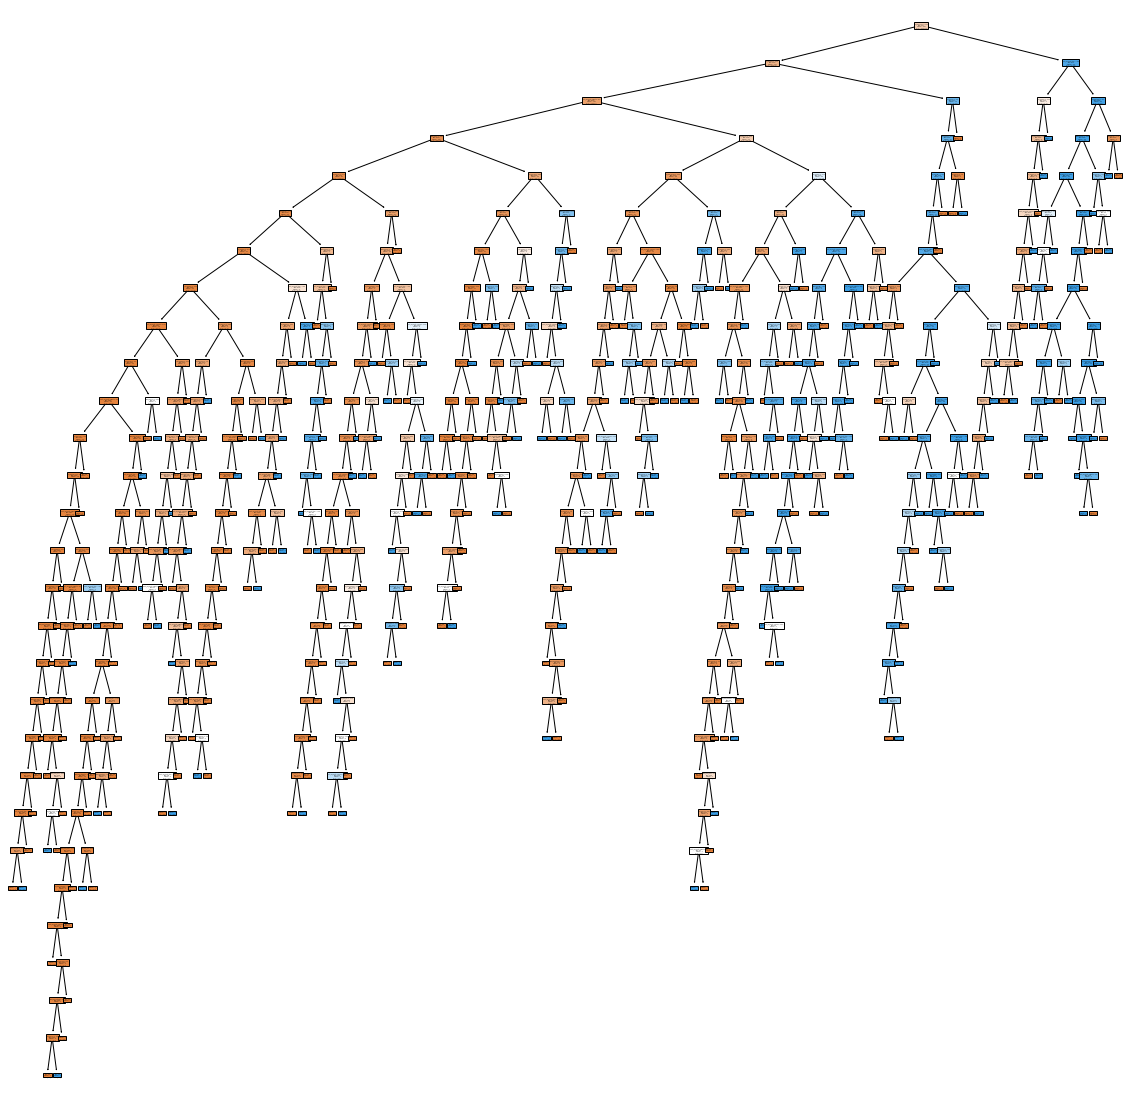

In [ ]:
from sklearn import tree
from matplotlib import pyplot as plt
plt.figure(figsize=(20,20))
_ = tree.plot_tree(randomForestClassifer.estimators_[1], feature_names=X.columns, filled=True)

Lets see the feature importance of the Random Forect Classifer

In [ ]:
feature_importances = randomForestClassifer.feature_importances_
features = X_train.columns
df1 = pd.DataFrame({'features': features, 'importance': feature_importances}).nlargest
print(df1)

<bound method DataFrame.nlargest of                       features  importance
0               word_freq_make    0.004821
1            word_freq_address    0.005271
2                word_freq_all    0.016380
3                 word_freq_3d    0.000659
4                word_freq_our    0.032858
5               word_freq_over    0.010895
6             word_freq_remove    0.058382
7           word_freq_internet    0.015316
8              word_freq_order    0.006843
9               word_freq_mail    0.012221
10           word_freq_receive    0.010902
11              word_freq_will    0.013136
12            word_freq_people    0.004399
13            word_freq_report    0.001883
14         word_freq_addresses    0.002509
15              word_freq_free    0.064778
16          word_freq_business    0.013189
17             word_freq_email    0.012240
18               word_freq_you    0.030581
19            word_freq_credit    0.007259
20              word_freq_your    0.046996
21              wo

**Lets next try some bagging methods.** Bagging still does the sampling with replacement, however there is still some fundemental differences. Bagging allows us to choose instances of the data that had been modeled poorly in subsequent bags and weight them according to this error. Lets first try the Ada boost algorithm. This algorithm has equal weights for all data points at the beginning.As Adaboost goes through each bag, it will increase the weights for misclassified observations. 

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

base_est = DecisionTreeClassifier (max_depth =2)
ada_boost = AdaBoostClassifier(base_est, n_estimators=500, random_state=42, learning_rate=.05)
ada_boost.fit(X_train, y_train)
predict_adaboost_score = ada_boost.predict(X_test)
accuracy_score_adaboost = accuracy_score(y_test,predict_adaboost_score)
print(accuracy_score_adaboost)

0.9551049963794352


**Next, lets try Gradiant Boosted Trees(GBT).** This is also a bagging method, which attempts to fix errors of preceding models. 

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gradientBoostingClassifier = GradientBoostingClassifier()
gradientBoostingClassifier.fit(X_train,y_train)
predict_gradientBoostingClassifier = gradientBoostingClassifier.predict(X_test)
accuracy_score_gradientBoostingClassifier = accuracy_score(y_test,predict_gradientBoostingClassifier)
print(accuracy_score_gradientBoostingClassifier)

0.946415640839971


**Finally lets look at XGBoost.** This is another great boosting algorithm that is well known because of how well it works. It allows for easy cross-validation and regularization.


In [ ]:
import xgboost as xgb

In [ ]:
# create an optimized structure for xgb
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [ ]:
xg_reg = xgb.XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

In [ ]:
xg_reg.fit(X_train,y_train)
xgb_predict = xg_reg.predict(X_test)
xgb_accuracy_score = accuracy_score(y_test,xgb_predict)
xgb_accuracy_score

[01:50:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.9507603186097031

Great. Now we can do the k-folds Cross Validation using XGBoost. This results in a less biased result. We can do this by splitting the dataset into k groups, and subdivide a testing data group and then make the remaining groups for training. Lets build a 5-fold cross validation. 

In [ ]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=42)

[02:01:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:01:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:01:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:01:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:01:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.471121,0.000300,0.472020,0.000614
1,0.450041,0.004138,0.451911,0.003333
2,0.425723,0.003028,0.428729,0.001731
3,0.405931,0.003997,0.409683,0.003146
4,0.388565,0.004653,0.392620,0.003894


Lets see our final model accuracies.

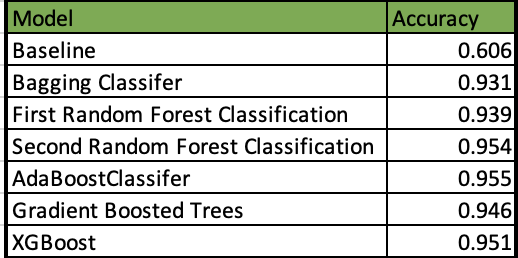

As you can see, the Second Random Forest Classification, XGBoost, and AdaBoost Classifier were very close and had an accuracy of 95%. The #1 predictor we found for classifying emails as spam or not spam is "char_freq_%21".